In [44]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [45]:
#loading the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [46]:
#categorizing the independent and dependent variable into x and y respectively
x = dataset.iloc[:,3:13].values
y = dataset.iloc[:,-1].values

In [47]:
x.shape

(10000, 10)

In [48]:
#encoding categorical variables
x = pd.DataFrame(x)
encoder = ColumnTransformer([('onehot', OneHotEncoder(), [1,2])], remainder= 'passthrough' )
x = np.array(encoder.fit_transform(x), dtype = np.int)
x = pd.DataFrame(x)

In [49]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,1,0,619,42,2,0,1,1,1,101348
1,0,0,1,1,0,608,41,1,83807,1,0,1,112542
2,1,0,0,1,0,502,42,8,159660,3,1,0,113931
3,1,0,0,1,0,699,39,1,0,2,0,0,93826
4,0,0,1,1,0,850,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,1,771,39,5,0,2,1,0,96270
9996,1,0,0,0,1,516,35,10,57369,1,1,1,101699
9997,1,0,0,1,0,709,36,7,0,1,0,1,42085
9998,0,1,0,0,1,772,42,3,75075,2,1,0,92888


In [50]:
#drop two dummy variable one from each category
x = x.drop(columns=[0])
x = x.drop(columns=[3])
x = x.iloc[:].values
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,619,42,2,0,1,1,1,101348
1,0,1,0,608,41,1,83807,1,0,1,112542
2,0,0,0,502,42,8,159660,3,1,0,113931
3,0,0,0,699,39,1,0,2,0,0,93826
4,0,1,0,850,43,2,125510,1,1,1,79084
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,771,39,5,0,2,1,0,96270
9996,0,0,1,516,35,10,57369,1,1,1,101699
9997,0,0,0,709,36,7,0,1,0,1,42085
9998,1,0,1,772,42,3,75075,2,1,0,92888


In [51]:
#splict the x and y dataset into training and testing set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0)

In [52]:
#feature scaling the training and test set

feascale = StandardScaler()
x_train = feascale.fit_transform(x_train)
x_test = feascale.transform(x_test)

In [53]:
#initializing the ANN
classifier = Sequential()

In [54]:
#adding the input and the hidden layer of the ANN and the output layer
classifier.add(Dense(6, kernel_initializer='glorot_uniform', activation='relu', input_shape=(11,)))
classifier.add(Dense(6, kernel_initializer='glorot_uniform', activation='relu'))
classifier.add(Dense(6, kernel_initializer='glorot_uniform', activation='relu'))
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [55]:
#configuring the ANN model
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics= ['accuracy'])

In [55]:
#fit the the training set to the ANN
classifier.fit(x_train, y_train, batch_size=10, epochs= 100)

Epoch 1/100
7500/7500 [==============================] - 1s 81us/step - loss: 0.5017 - accuracy: 0.7957
Epoch 2/100
7500/7500 [==============================] - 1s 74us/step - loss: 0.4526 - accuracy: 0.7963 0s - loss: 0.4519 - accu
Epoch 3/100
7500/7500 [==============================] - 1s 70us/step - loss: 0.4408 - accuracy: 0.7963
Epoch 4/100
7500/7500 [==============================] - 1s 71us/step - loss: 0.4331 - accuracy: 0.7963
Epoch 5/100
7500/7500 [==============================] - 1s 71us/step - loss: 0.4269 - accuracy: 0.7963
Epoch 6/100
7500/7500 [==============================] - 1s 75us/step - loss: 0.4198 - accuracy: 0.7971
Epoch 7/100
7500/7500 [==============================] - 1s 70us/step - loss: 0.4116 - accuracy: 0.8141
Epoch 8/100
7500/7500 [==============================] - 1s 72us/step - loss: 0.4009 - accuracy: 0.8283 0s - loss: 0.4044 - accura
Epoch 9/100
7500/7500 [==============================] - 1s 77us/step - loss: 0.3905 - accuracy: 0.8368
Epoch 10/100

In [56]:
#using the trained model to test the testing sets
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [57]:
#construccting the confuction metrix
confmetrix = confusion_matrix(y_test, y_pred)

In [58]:
confmetrix

array([[1885,  106],
       [ 249,  260]], dtype=int64)

In [62]:
(1885+ 260)/2500

0.858

In [9]:
axe = axe.ravel()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002075C76B148>,
       ...,
      dtype=object)

In [33]:
aa = np.arange(0,15*15)

In [34]:
aa

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

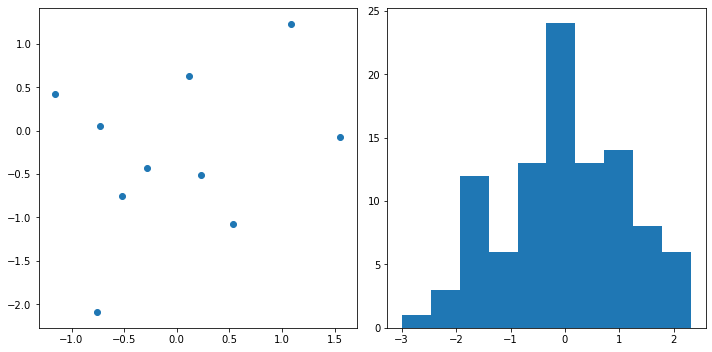

In [35]:
import matplotlib.pyplot as plt
import numpy as np
f, axes = plt.subplots(1,2)  # 1 row containing 2 subplots.

# Plot random points on one subplots.
axes[0].scatter(np.random.randn(10), np.random.randn(10))

# Plot histogram on the other one.
axes[1].hist(np.random.randn(100))

# Adjust the size and layout through the Figure-object.
f.set_size_inches(10, 5)
f.tight_layout()

In [38]:
np.reshape()

matplotlib.figure.Figure